In [1]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


     -------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import re



nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter


from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\snbha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snbha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
 #importing the training data
review_data=pd.read_csv('sample.csv')
print(review_data.shape)
review_data.head(10)

(256149, 7)


Source        Date Title  \
0  Fiit: Workouts & Fitness Plans  27/06/2022   NaN   
1  Fiit: Workouts & Fitness Plans  26/06/2022   NaN   
2  Fiit: Workouts & Fitness Plans  25/06/2022   NaN   
3  Fiit: Workouts & Fitness Plans  25/06/2022   NaN   
4  Fiit: Workouts & Fitness Plans  20/06/2022   NaN   
5  Fiit: Workouts & Fitness Plans  17/06/2022   NaN   
6  Fiit: Workouts & Fitness Plans  16/06/2022   NaN   
7  Fiit: Workouts & Fitness Plans  14/06/2022   NaN   
8  Fiit: Workouts & Fitness Plans  14/06/2022   NaN   
9  Fiit: Workouts & Fitness Plans  12/06/2022   NaN   

                                             Content                Name  \
0  In 2022 you shouldn't have to contact support ...       Tanya Mcgrory   
1  Tried to create acct after downloading it says...               EK Ow   
2                        Very good,enjoyed the class           Val Smith   
3  Best fitness app!!!! Having tried several work...   Catherine Scruton   
4  Good fitness classes and instructors. App howe...          Emeka Kanu   
5  Great app and workouts. So good when you don't...  Cristina Balekjian   
6  If you are totally new to exercise app it's a ...        Linda Duggan   
7  Great app however very annoyed my Samsung Gala...       Clare Woodger   
8              Good. Looks a tad basic, but is good.       Anthony Brown   
9  Best app out there! Two essential features (st...     Mohamad Nossier   

   Rating     Version  
0       1  2.6.0#1496  
1       2  2.6.0#1496  
2       5  2.6.0#1496  
3       5  2.6.0#1496  
4       3  2.5.0#1491  
5       5  2.5.0#1491  
6       3  2.5.0#1491  
7       3  2.5.0#1491  
8       4  2.5.0#1491  
9       3  2.5.0#1491

In [3]:
#Summary of the dataset
review_data.describe()

Rating
count  256149.000000
mean        3.763661
std         1.598884
min         0.000000
25%         2.000000
50%         5.000000
75%         5.000000
max         5.000000

In [4]:
review_data.drop(['Source','Title','Version','Name'],axis=1,inplace=True)

In [5]:
review_data.head()

Date                                            Content  Rating
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1
1  26/06/2022  Tried to create acct after downloading it says...       2
2  25/06/2022                        Very good,enjoyed the class       5
3  25/06/2022  Best fitness app!!!! Having tried several work...       5
4  20/06/2022  Good fitness classes and instructors. App howe...       3

In [6]:
#Shape of dataframe
print(" Shape of training dataframe: ", review_data.shape)

 Shape of training dataframe:  (256149, 3)


In [7]:
# Drop duplicates
review_data.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", review_data.shape)

 Shape of dataframe after dropping duplicates:  (256149, 3)


In [8]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['Rating'] == 3.0:
        val = 'Neutral'
    elif row['Rating'] == 1.0 or row['Rating'] == 2.0 or row['Rating']== 0.0:
        val = 'Negative'
    elif row['Rating'] == 4.0 or row['Rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [9]:
#Applying the function in our new column
review_data['sentiment'] = review_data.apply(f, axis=1)
review_data.head()

Date                                            Content  Rating  \
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1   
1  26/06/2022  Tried to create acct after downloading it says...       2   
2  25/06/2022                        Very good,enjoyed the class       5   
3  25/06/2022  Best fitness app!!!! Having tried several work...       5   
4  20/06/2022  Good fitness classes and instructors. App howe...       3   

  sentiment  
0  Negative  
1  Negative  
2  Positive  
3  Positive  
4   Neutral

In [10]:
review_data['sentiment'].value_counts()

Positive    172208
Negative     64475
Neutral      19466
Name: sentiment, dtype: int64

In [11]:
review_data['Rating'].value_counts()

5    137780
1     45426
4     34428
3     19466
2     16811
0      2238
Name: Rating, dtype: int64

In [12]:
# new data frame which has date and year
new = review_data["Date"].str.split("/", n = 1, expand = True) 
  
# making separate date column from new data frame 
review_data["date"]= new[0] 
  
# making separate year column from new data frame 
review_data["month"]= new[1]  
review_data.head()

Date                                            Content  Rating  \
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1   
1  26/06/2022  Tried to create acct after downloading it says...       2   
2  25/06/2022                        Very good,enjoyed the class       5   
3  25/06/2022  Best fitness app!!!! Having tried several work...       5   
4  20/06/2022  Good fitness classes and instructors. App howe...       3   

  sentiment date    month  
0  Negative   27  06/2022  
1  Negative   26  06/2022  
2  Positive   25  06/2022  
3  Positive   25  06/2022  
4   Neutral   20  06/2022

In [13]:
# Splitting the monnth
new1 = review_data["month"].str.split("/", n = 1, expand = True) 
  
# adding month to the main dataset 
review_data["Month"]= new1[0] 
  
# adding day to the main dataset 
review_data["Year"]= new1[1] 

review_data.head()

Date                                            Content  Rating  \
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1   
1  26/06/2022  Tried to create acct after downloading it says...       2   
2  25/06/2022                        Very good,enjoyed the class       5   
3  25/06/2022  Best fitness app!!!! Having tried several work...       5   
4  20/06/2022  Good fitness classes and instructors. App howe...       3   

  sentiment date    month Month  Year  
0  Negative   27  06/2022    06  2022  
1  Negative   26  06/2022    06  2022  
2  Positive   25  06/2022    06  2022  
3  Positive   25  06/2022    06  2022  
4   Neutral   20  06/2022    06  2022

In [14]:
#review_data.drop(['month','Date'],axis=1,inplace=True)

In [15]:
review_data.head()

Date                                            Content  Rating  \
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1   
1  26/06/2022  Tried to create acct after downloading it says...       2   
2  25/06/2022                        Very good,enjoyed the class       5   
3  25/06/2022  Best fitness app!!!! Having tried several work...       5   
4  20/06/2022  Good fitness classes and instructors. App howe...       3   

  sentiment date    month Month  Year  
0  Negative   27  06/2022    06  2022  
1  Negative   26  06/2022    06  2022  
2  Positive   25  06/2022    06  2022  
3  Positive   25  06/2022    06  2022  
4   Neutral   20  06/2022    06  2022

In [16]:
#Creating a copy 
clean_reviews=review_data.copy()

In [17]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [18]:
review_data['reviews']=review_data['Content'].apply(lambda x:review_cleaning(x))
review_data.head()

Date                                            Content  Rating  \
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1   
1  26/06/2022  Tried to create acct after downloading it says...       2   
2  25/06/2022                        Very good,enjoyed the class       5   
3  25/06/2022  Best fitness app!!!! Having tried several work...       5   
4  20/06/2022  Good fitness classes and instructors. App howe...       3   

  sentiment date    month Month  Year  \
0  Negative   27  06/2022    06  2022   
1  Negative   26  06/2022    06  2022   
2  Positive   25  06/2022    06  2022   
3  Positive   25  06/2022    06  2022   
4   Neutral   20  06/2022    06  2022   

                                             reviews  
0  in  you shouldnt have to contact support to ca...  
1  tried to create acct after downloading it says...  
2                         very goodenjoyed the class  
3  best fitness app having tried several workout ...  
4  good fitness classes and instructors app howev...

We have removed all punctuation in our review column

In [19]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\snbha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\snbha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Removig Punctuation

In [20]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
review_data['cleaned_text'] = review_data['reviews'].apply(lambda x:clean_text(x))
review_data['cleaned_text'] =review_data['reviews'].replace('"]'," ")

In [21]:
review_data.head()

Date                                            Content  Rating  \
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1   
1  26/06/2022  Tried to create acct after downloading it says...       2   
2  25/06/2022                        Very good,enjoyed the class       5   
3  25/06/2022  Best fitness app!!!! Having tried several work...       5   
4  20/06/2022  Good fitness classes and instructors. App howe...       3   

  sentiment date    month Month  Year  \
0  Negative   27  06/2022    06  2022   
1  Negative   26  06/2022    06  2022   
2  Positive   25  06/2022    06  2022   
3  Positive   25  06/2022    06  2022   
4   Neutral   20  06/2022    06  2022   

                                             reviews  \
0  in  you shouldnt have to contact support to ca...   
1  tried to create acct after downloading it says...   
2                         very goodenjoyed the class   
3  best fitness app having tried several workout ...   
4  good fitness classes and instructors app howev...   

                                        cleaned_text  
0  in  you shouldnt have to contact support to ca...  
1  tried to create acct after downloading it says...  
2                         very goodenjoyed the class  
3  best fitness app having tried several workout ...  
4  good fitness classes and instructors app howev...

## STEMMING AND LEMMATIZATION

In [22]:
data=pd.DataFrame()
data['text']=review_data['cleaned_text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['tokenized'] = data['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
data['No_stopwords'] = data['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

data['stemmed_porter'] = data['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
data['stemmed_snowball'] = data['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['lemmatized'] = data['No_stopwords'].apply(lambda x: lemmatizer(x))

In [23]:
review_data['text']=data['lemmatized']
review_data.head()

Date                                            Content  Rating  \
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1   
1  26/06/2022  Tried to create acct after downloading it says...       2   
2  25/06/2022                        Very good,enjoyed the class       5   
3  25/06/2022  Best fitness app!!!! Having tried several work...       5   
4  20/06/2022  Good fitness classes and instructors. App howe...       3   

  sentiment date    month Month  Year  \
0  Negative   27  06/2022    06  2022   
1  Negative   26  06/2022    06  2022   
2  Positive   25  06/2022    06  2022   
3  Positive   25  06/2022    06  2022   
4   Neutral   20  06/2022    06  2022   

                                             reviews  \
0  in  you shouldnt have to contact support to ca...   
1  tried to create acct after downloading it says...   
2                         very goodenjoyed the class   
3  best fitness app having tried several workout ...   
4  good fitness classes and instructors app howev...   

                                        cleaned_text  \
0  in  you shouldnt have to contact support to ca...   
1  tried to create acct after downloading it says...   
2                         very goodenjoyed the class   
3  best fitness app having tried several workout ...   
4  good fitness classes and instructors app howev...   

                                                text  
0         [shouldnt, contact, support, cancel, plan]  
1  [tried, create, acct, downloading, say, unavai...  
2                               [goodenjoyed, class]  
3  [best, fitness, app, tried, several, workout, ...  
4  [good, fitness, class, instructor, app, howeve...

## Exploratory Data Analysis

In [24]:
temp = review_data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

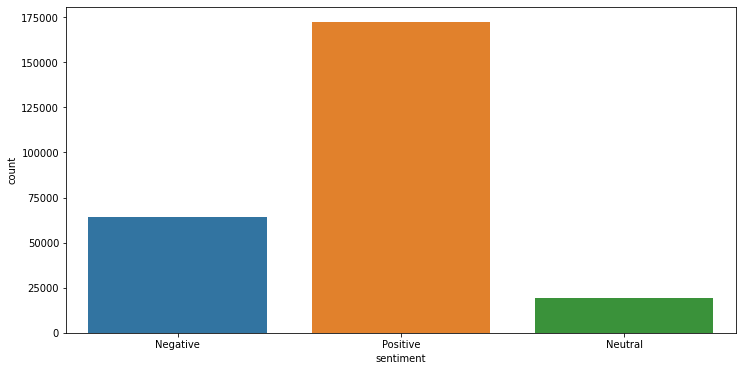

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=review_data)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [26]:
Positive_review = review_data[review_data['sentiment']=='Positive'].reset_index()
Negative_review = review_data[review_data['sentiment']=='Negative'].reset_index()
Neutral_review = review_data[review_data['sentiment']=='Neutral'].reset_index()

## Positive Review

In [27]:
all_positive_words=[]
for i in range(len(Positive_review['text'])):
    a=Positive_review['text'][i]
    for i in a:
        all_positive_words.append(i)
all_positive_words=pd.Series(np.array(all_positive_words))
common_words=all_positive_words.value_counts().drop(labels='')[:20].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='20 Most Common Words In Positive Reviews')
fig.show()


e:\Program Files\Python38\lib\site-packages\plotly\express\_core.py:1585: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



reviewTweets

In [28]:
all_negative_words=[]
for i in range(len(Negative_review['text'])):
    a=Negative_review['text'][i]
    for i in a:
        all_negative_words.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
common_words=all_negative_words.value_counts().drop(labels='')[:20].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='20 Most Common Words In Negative Reviews')
fig.show()

e:\Program Files\Python38\lib\site-packages\plotly\express\_core.py:1585: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## NEUTRAL review

In [29]:
all_neutral_words=[]
for i in range(len(Neutral_review['text'])):
    a=Neutral_review['text'][i]
    for i in a:
        all_neutral_words.append(i)
all_neutral_words=pd.Series(np.array(all_neutral_words))
common_words=all_neutral_words.value_counts().drop(labels='')[:20].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='20 Most Common Words In Neutral Reviews')
fig.show()

e:\Program Files\Python38\lib\site-packages\plotly\express\_core.py:1585: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [30]:
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

common_words=all_negative_words.value_counts().drop(labels=common_list)[:20].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='Top 20 Unique Words In Negative REviews')
fig.show()
common_words=all_positive_words.value_counts().drop(labels=common_list)[:20].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='Top 20 Unique Words In Positive Reviews')
fig.show()
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:20].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='Top 20 Unique Words In Neutral Reviews')
fig.show()

e:\Program Files\Python38\lib\site-packages\plotly\express\_core.py:1585: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



e:\Program Files\Python38\lib\site-packages\plotly\express\_core.py:1585: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



e:\Program Files\Python38\lib\site-packages\plotly\express\_core.py:1585: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



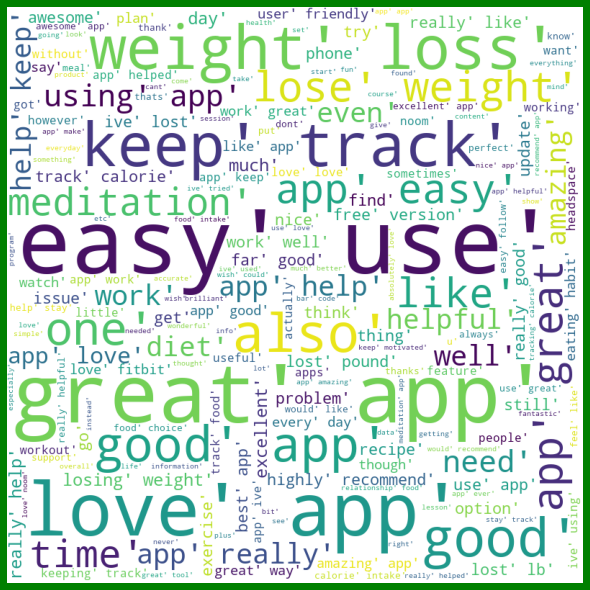

In [31]:
comment_words = '' 
# iterate through the csv file 
for val in Positive_review.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

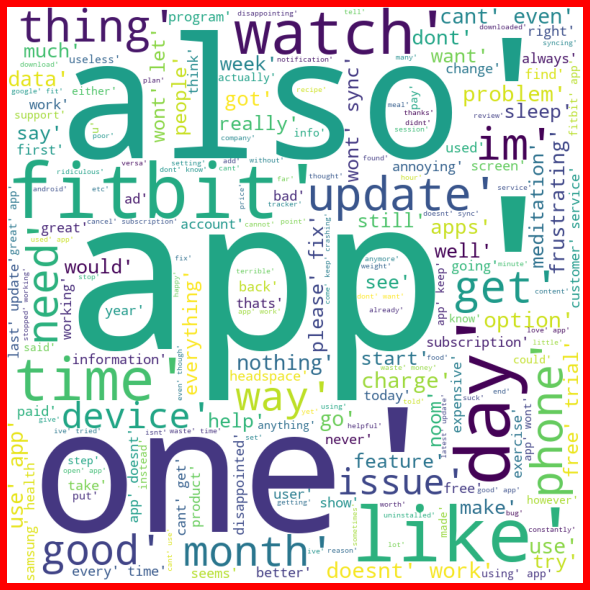

In [32]:
comment_words = '' 
for val in Negative_review.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()   

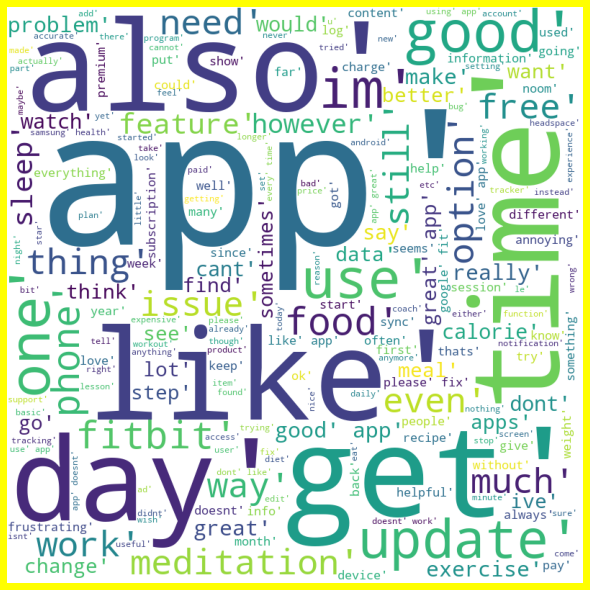

In [33]:
comment_words = '' 

for val in Neutral_review.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "yellow") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## TIME BASED SETIMENT ANALYSIS

<Figure size 2880x2160 with 0 Axes>

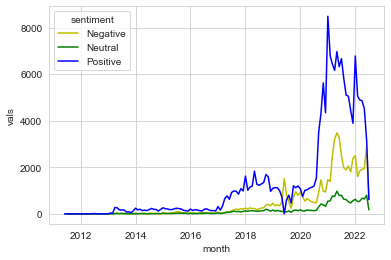

<Figure size 2880x2160 with 0 Axes>

In [34]:
review_data["month"] = pd.to_datetime(review_data.month) 
timeline = review_data.resample('D', on='month')["sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("month", var_name='sentiment',  value_name='vals')

sns.set_style("whitegrid")
sns.lineplot(x="month", y="vals", hue="sentiment", data=timeline, palette=["y", "g","b"])
plt.figure(figsize=(40,30))

## Need to be done below work

The key aspects I’m looking at 6 aspects General, Reliability, Usability, Functionality, Pricing, Support Also Visualization , but now narrowing it down to just usability qualities? 
* Features or New features 
* Attractive or Attractiveness 
* Simplicity or Easy to use 
* Accurate or Accuracy 
* Memorability or Relevance or Usefulness 

For example
•	if a user says this app runs easy as smooth.. that is related to usability 
•	 if they say the app is not worth paying for, that is related to pricing
 At the end , I want to know the percentage of sentiments that mostly bother on usability. Compared to other aspects. Visualization: 


In [35]:
list_of_aspects = ["General", "Reliability", "Usability", "Functionality", "Pricing", "Support"]

In [36]:
review_data.head()

Date                                            Content  Rating  \
0  27/06/2022  In 2022 you shouldn't have to contact support ...       1   
1  26/06/2022  Tried to create acct after downloading it says...       2   
2  25/06/2022                        Very good,enjoyed the class       5   
3  25/06/2022  Best fitness app!!!! Having tried several work...       5   
4  20/06/2022  Good fitness classes and instructors. App howe...       3   

  sentiment date      month Month  Year  \
0  Negative   27 2022-06-01    06  2022   
1  Negative   26 2022-06-01    06  2022   
2  Positive   25 2022-06-01    06  2022   
3  Positive   25 2022-06-01    06  2022   
4   Neutral   20 2022-06-01    06  2022   

                                             reviews  \
0  in  you shouldnt have to contact support to ca...   
1  tried to create acct after downloading it says...   
2                         very goodenjoyed the class   
3  best fitness app having tried several workout ...   
4  good fitness classes and instructors app howev...   

                                        cleaned_text  \
0  in  you shouldnt have to contact support to ca...   
1  tried to create acct after downloading it says...   
2                         very goodenjoyed the class   
3  best fitness app having tried several workout ...   
4  good fitness classes and instructors app howev...   

                                                text  
0         [shouldnt, contact, support, cancel, plan]  
1  [tried, create, acct, downloading, say, unavai...  
2                               [goodenjoyed, class]  
3  [best, fitness, app, tried, several, workout, ...  
4  [good, fitness, class, instructor, app, howeve...

In [37]:
nlp = spacy.load('en_core_web_sm')

In [38]:
def pos_tagging(data):
    print("pos tagging")
    req_tag = ['NN']
    extracted_words = []
    i = 0
    try:
        for x in review_data['cleaned_text']:
            doc = nlp(x)
            for token in doc:
                i += 1
                if token.tag_ in req_tag and token.shape_ != 'x' and token.shape_ != 'xx' and token.shape_ != 'xxx':
                    extracted_words.append(token.lemma_)
        return extracted_words
    except Exception as e:
        print(e)
        return extracted_words
        
extract_words = pos_tagging(data)

pos tagging


In [39]:
len(extract_words)

786254

In [40]:
len(review_data)

256149

In [41]:
extract_words[:10]

['support',
 'plan',
 'acct',
 'class',
 'fitness',
 'workout',
 'strength',
 'movement',
 'list',
 'week']

In [42]:
# download GoogleNews-vectors-negative300.bin.gz file using url "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
# unzip the file and save it in the current directory
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')


In [53]:
del all_negative_words
del all_neutral_words
del all_positive_words
del clean_reviews
del comment_words
del data
del Negative_review
del Neutral_review
del new
del new1
del Positive_review

In [54]:
del common
del common_list
del common_words
del x

In [55]:
del a, fig, i, ps, s_stemmer, stopword, STOPWORDS, temp, timeline, val, wn, wordcloud

In [100]:
from tqdm import tqdm
# intersection of filtered_terms and wv.index_to_key
filtered_terms = list(set(filtered_terms) & set(wv.index_to_key))
len(filtered_terms)

9935

In [101]:
#converting words into vector
vector_of_terms = []
for x in range(len(filtered_terms)):
    vector_of_terms.append(wv[filtered_terms[x]])

In [102]:
len(vector_of_terms), len(filtered_terms)

(9935, 9935)

In [114]:

def get_top_n_similar_words(query_word, N = 100):
    cosine_sim = wv.cosine_similarities(wv.get_vector(query_word), vector_of_terms)
    ind = np.argpartition(cosine_sim, -N)[-N:]
    
    aspect_words_list = []
    similarity_score_list = []

    for i in ind:
        aspect_words_list.append(filtered_terms[i])
        similarity_score_list.append(cosine_sim[i])

    aspect_df = pd.DataFrame({"aspect_words": aspect_words_list, "similarity_score_list": similarity_score_list})
    return aspect_df


## Top aspects words related to "usability"

In [138]:
df_usability = get_top_n_similar_words(query_word = "usability", N = 500)
df_usability

aspect_words  similarity_score_list
0           satnav               0.254098
1         tweeking               0.254147
2    comparability               0.254178
3          gemacht               0.254320
4        microsoft               0.255114
..             ...                    ...
495    flexability               0.302241
496  accessibility               0.585333
497     robustness               0.456574
498    flexibility               0.341247
499        captcha               0.332086

[500 rows x 2 columns]

In [142]:
## Top aspects words related to "general"
df_general = get_top_n_similar_words(query_word = "general", N = 500)
df_general

aspect_words  similarity_score_list
0       beverage               0.133715
1         upkeep               0.133746
2       override               0.133770
3       especial               0.133781
4       commuity               0.133855
..           ...                    ...
495        level               0.142215
496       leader               0.166927
497         hvac               0.176552
498    disregard               0.143258
499       agency               0.207256

[500 rows x 2 columns]

In [139]:
## Top aspects words related to "Reliability"
df_reliability = get_top_n_similar_words(query_word = "Reliability", N = 500)
df_reliability

aspect_words  similarity_score_list
0             gadget               0.166778
1              nivel               0.166870
2         theability               0.167071
3           interfaz               0.170135
4           obstante               0.167859
..               ...                    ...
495           atthis               0.189249
496  customisability               0.285456
497         customer               0.284515
498             hvac               0.258124
499            neuen               0.229164

[500 rows x 2 columns]

In [141]:
## Top aspects words related to "Functionality"
df_functionality = get_top_n_similar_words(query_word = "Functionality", N = 500)
df_functionality

aspect_words  similarity_score_list
0            biotin               0.235603
1            dialog               0.235738
2           overlay               0.235777
3            access               0.236321
4             mouse               0.236016
..              ...                    ...
495            jede               0.333673
496         agility               0.263664
497          subset               0.268055
498  sophistication               0.249164
499       strategie               0.281126

[500 rows x 2 columns]

In [140]:
## Top aspects words related to "Pricing"
df_pricing = get_top_n_similar_words(query_word = "Pricing", N = 500)
df_pricing

aspect_words  similarity_score_list
0        freight               0.173417
1     equivilant               0.173553
2         slider               0.173600
3          wella               0.173657
4           saas               0.174008
..           ...                    ...
495         baud               0.182027
496     standard               0.201651
497            ¢               0.184118
498        afree               0.199372
499    budgeting               0.226909

[500 rows x 2 columns]

In [143]:
## Top aspects words related to "Support"
df_support = get_top_n_similar_words(query_word = "Support", N = 500)
df_support

aspect_words  similarity_score_list
0         homescreen               0.139813
1            gemacht               0.140026
2          framework               0.140018
3     disappointment               0.140048
4      reimbursement               0.140154
..               ...                    ...
495          acronym               0.230113
496         training               0.194532
497  troubleshooting               0.210948
498     mentalhealth               0.194132
499         fighting               0.205612

[500 rows x 2 columns]

In [144]:
# Get list of postive and negative words from nltk using vader_lexicon.txt
# Import the SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Creat the variable sa to hold the VADER lexicon object 
sa = SentimentIntensityAnalyzer()

# postive words are keys from sa.lexicon whose value is > 0
# negative words are keys from sa.lexicon whose value is < 0
# neutral words are keys from sa.lexicon whose value is 0

# get list of positive words
positive_words = [k for k, v in sa.lexicon.items() if v > 0]
len(positive_words)
negative_words = [k for k, v in sa.lexicon.items() if v < 0]

In [145]:
# create a list of globally defined positive and negative words to identify sentiment using nltk



# sentiment score based on the laxicon neg, pos words
def feature_sentiment(sentence, pos, neg):
    '''
    input: dictionary and sentence
    function: appends dictionary with new features if the feature
              did not exist previously,then updates sentiment to
              each of the new or existing features
    output: updated dictionary
    '''
    sent_dict = dict()
    sentence = nlp(sentence)
    opinion_words = neg + pos
    debug = 0
    for token in sentence:
        # check if the word is an opinion word, then assign sentiment
        if token.text in opinion_words:
            sentiment = 1 if token.text in pos else -1
            # if target is an adverb modifier (i.e. pretty, highly, etc.)
            # but happens to be an opinion word, ignore and pass
            if (token.dep_ == "advmod"):
                continue
            elif (token.dep_ == "amod"):
                sent_dict[token.head.text] = sentiment
            # for opinion words that are adjectives, adverbs, verbs...
            else:
                for child in token.children:
                    # if there's a adj modifier (i.e. very, pretty, etc.) add more weight to sentiment
                    # This could be better updated for modifiers that either positively or negatively emphasize
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    # check for negation words and flip the sign of sentiment
                    if child.dep_ == "neg":
                        sentiment *= -1
                for child in token.children:
                    # if verb, check if there's a direct object
                    if (token.pos_ == "VERB") & (child.dep_ == "dobj"):                        
                        sent_dict[child.text] = sentiment
                        # check for conjugates (a AND b), then add both to dictionary
                        subchildren = []
                        conj = 0
                        for subchild in child.children:
                            if subchild.text == "and":
                                conj=1
                            if (conj == 1) and (subchild.text != "and"):
                                subchildren.append(subchild.text)
                                conj = 0
                        for subchild in subchildren:
                            sent_dict[subchild] = sentiment

                # check for negation
                for child in token.head.children:
                    noun = ""
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    # check for negation words and flip the sign of sentiment
                    if (child.dep_ == "neg"): 
                        sentiment *= -1
                
                # check for nouns
                for child in token.head.children:
                    noun = ""
                    if (child.pos_ == "NOUN") and (child.text not in sent_dict):
                        noun = child.text
                        # Check for compound nouns
                        for subchild in child.children:
                            if subchild.dep_ == "compound":
                                noun = subchild.text + " " + noun
                        sent_dict[noun] = sentiment
                    debug += 1
    return sent_dict

In [146]:
# example 
tweet = "food was good but service was disappointing"
print(feature_sentiment(tweet, pos = positive_words, neg = negative_words))
## Output: {'food': 1, 'service': -1} 

{'food': 1, 'service': -1}


In [147]:
# example 
tweet = "I dont like this smartphone but I like its camera"
print(feature_sentiment(tweet, pos = positive_words, neg = negative_words))

{'this': -1, 'smartphone': 1, 'camera': 1}


In [173]:
df_usability_positive_words = set(df_usability["aspect_words"].tolist()).intersection(set(positive_words))  
df_usability_negative_words = set(df_usability["aspect_words"].tolist()).intersection(set(negative_words))

df_general_positive_words = set(df_general["aspect_words"].tolist()).intersection(set(positive_words))  
df_general_negative_words = set(df_general["aspect_words"].tolist()).intersection(set(negative_words))

df_reliability_positive_words = set(df_reliability["aspect_words"].tolist()).intersection(set(positive_words))  
df_reliability_negative_words = set(df_reliability["aspect_words"].tolist()).intersection(set(negative_words))

df_functionality_positive_words = set(df_functionality["aspect_words"].tolist()).intersection(set(positive_words))  
df_functionality_negative_words = set(df_functionality["aspect_words"].tolist()).intersection(set(negative_words))

df_pricing_positive_words = set(df_pricing["aspect_words"].tolist()).intersection(set(positive_words))  
df_pricing_negative_words = set(df_pricing["aspect_words"].tolist()).intersection(set(negative_words))

df_support_positive_words = set(df_support["aspect_words"].tolist()).intersection(set(positive_words))  
df_support_negative_words = set(df_support["aspect_words"].tolist()).intersection(set(negative_words))

In [216]:
# bar plot of sentiment for each aspect
df_usability["sentiment"] = df_usability["aspect_words"].apply(lambda x: -1 if x in df_usability_negative_words else 1 if x in df_usability_positive_words else 0)
df_general["sentiment"] = df_general["aspect_words"].apply(lambda x: -1 if x in df_general_negative_words else 1 if x in df_general_positive_words else 0)
df_reliability["sentiment"] = df_reliability["aspect_words"].apply(lambda x: -1 if x in df_reliability_negative_words else 1 if x in df_reliability_positive_words else 0)
df_functionality["sentiment"] = df_functionality["aspect_words"].apply(lambda x: -1 if x in df_functionality_negative_words else 1 if x in df_functionality_positive_words else 0)
df_pricing["sentiment"] = df_pricing["aspect_words"].apply(lambda x: -1 if x in df_pricing_negative_words else 1 if x in df_pricing_positive_words else 0)
df_support["sentiment"] = df_support["aspect_words"].apply(lambda x: -1 if x in df_support_negative_words else 1 if x in df_support_positive_words else 0)


<AxesSubplot:title={'center':'Sentiment for Usability aspect'}, xlabel='Sentiment', ylabel='Percentage'>

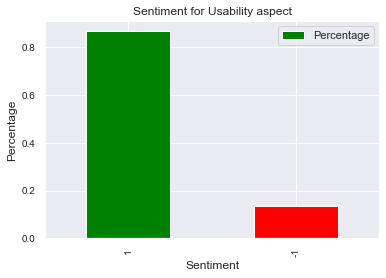

In [247]:
df_usability[df_usability["sentiment"] != 0]["sentiment"].value_counts(normalize=True).reset_index().rename(columns={"index": "sentiment", "sentiment": "Percentage"}).plot(kind='bar', 
                                                title='Sentiment for Usability aspect',  fontsize=10, color = ['green', 'red'], x = 'sentiment', y = 'Percentage', 
                                                figsize=(6,4), xlabel = 'Sentiment', ylabel = 'Percentage')

<AxesSubplot:title={'center':'Sentiment for General aspect'}, xlabel='Sentiment', ylabel='percent'>

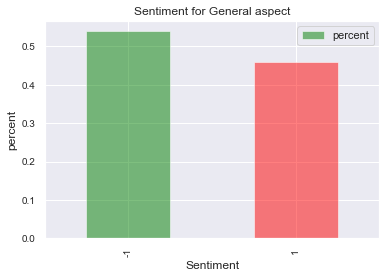

In [248]:
df_general[df_general["sentiment"] != 0]["sentiment"].value_counts(normalize=True).reset_index().rename(columns={"index": "sentiment", "sentiment": "percent"}).plot(kind='bar', alpha=0.5, x = "sentiment", y = "percent",
                                                title='Sentiment for General aspect',  fontsize=10, color = ['green', 'red'],
                                                figsize=(6,4), xlabel = 'Sentiment', ylabel = 'percent')

<AxesSubplot:title={'center':'Sentiment for Reliability aspect'}, xlabel='Sentiment', ylabel='percent'>

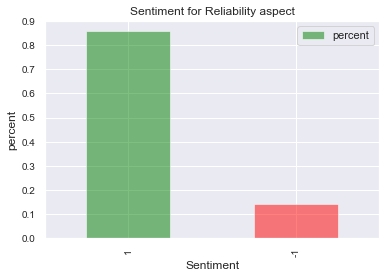

In [250]:
df_reliability[df_reliability["sentiment"] != 0]["sentiment"].value_counts(normalize = True).reset_index().rename(columns={"index": "sentiment", "sentiment": "percent"}).plot(kind='bar', alpha=0.5, x = "sentiment", y = "percent",
                                                title='Sentiment for Reliability aspect',  fontsize=10, color = ['green', 'red'],
                                                figsize=(6,4), xlabel = 'Sentiment', ylabel = 'percent')

<AxesSubplot:title={'center':'Sentiment for functionality aspect'}, xlabel='Sentiment', ylabel='percent'>

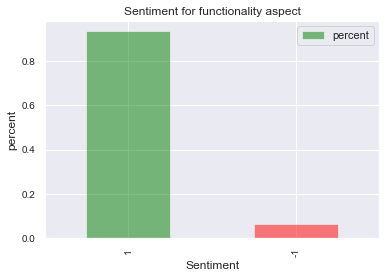

In [251]:
df_functionality[df_functionality["sentiment"] != 0]["sentiment"].value_counts(normalize = True).reset_index().rename(columns={"index": "sentiment", "sentiment": "percent"}).plot(kind='bar', alpha=0.5, x = "sentiment", y = "percent",
                                                title='Sentiment for functionality aspect',  fontsize=10, color = ['green', 'red'],
                                                figsize=(6,4), xlabel = 'Sentiment', ylabel = 'percent')

<AxesSubplot:title={'center':'Sentiment for functionality aspect'}, xlabel='Sentiment', ylabel='percent'>

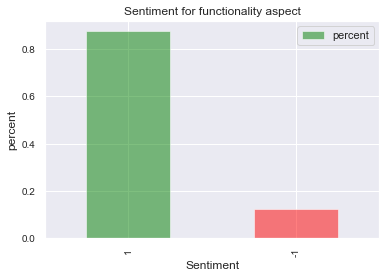

In [252]:
df_pricing[df_pricing["sentiment"] != 0]["sentiment"].value_counts(normalize = True).reset_index().rename(columns={"index": "sentiment", "sentiment": "percent"}).plot(kind='bar', alpha=0.5, x = "sentiment", y = "percent",
                                                title='Sentiment for functionality aspect',  fontsize=10, color = ['green', 'red'],
                                                figsize=(6,4), xlabel = 'Sentiment', ylabel = 'percent')

<AxesSubplot:title={'center':'Sentiment for functionality aspect'}, xlabel='Sentiment', ylabel='percent'>

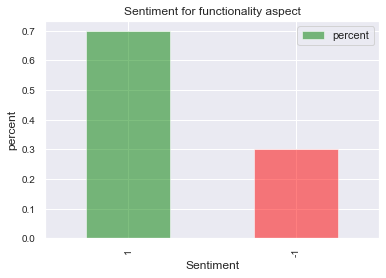

In [253]:
df_support[df_support["sentiment"] != 0]["sentiment"].value_counts(normalize = True).reset_index().rename(columns={"index": "sentiment", "sentiment": "percent"}).plot(kind='bar', alpha=0.5, x = "sentiment", y = "percent",
                                                title='Sentiment for functionality aspect',  fontsize=10, color = ['green', 'red'],
                                                figsize=(6,4), xlabel = 'Sentiment', ylabel = 'percent')

In [255]:
# create wordcloud for each aspect
def wordcloud_aspect(df):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(df["aspect_words"].tolist()))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Wordcloud for "positive" and "negative" aspects words for "usability"

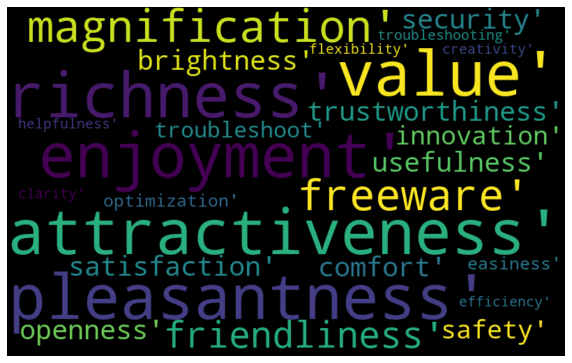

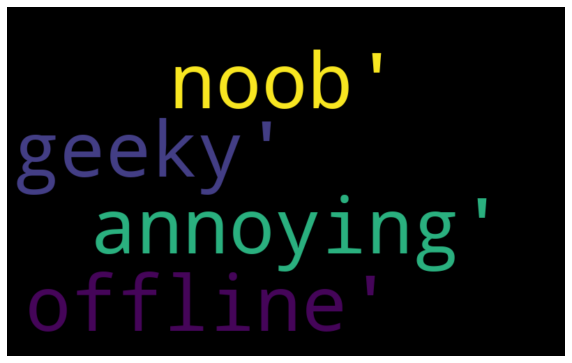

(None, None)

In [265]:
wordcloud_aspect(df_usability[df_usability["sentiment"] == 1]), wordcloud_aspect(df_usability[df_usability["sentiment"] == -1])

### Wordcloud for "positive" and "negative" aspects words for "general"

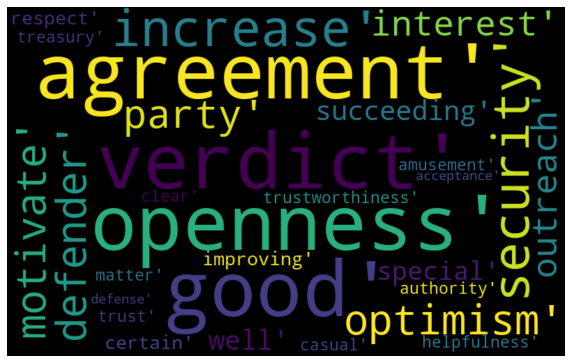

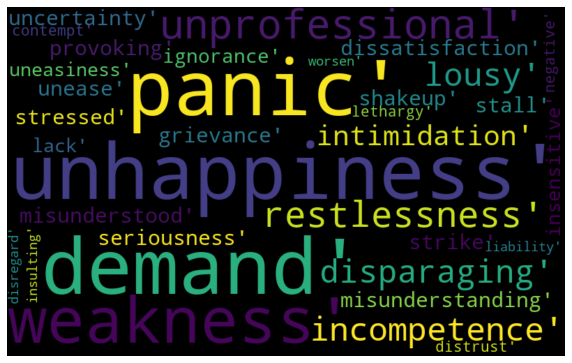

(None, None)

In [259]:
wordcloud_aspect(df_general[df_general["sentiment"] == 1]), wordcloud_aspect(df_general[df_general["sentiment"] == -1])

### Wordcloud for "positive" and "negative" aspects words for "Reliability"

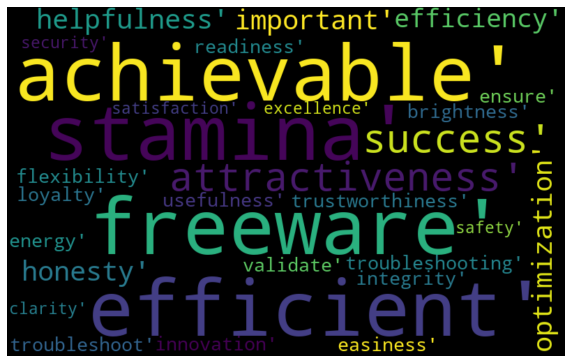

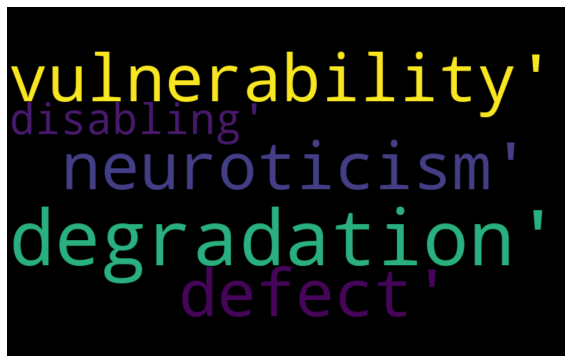

(None, None)

In [260]:
wordcloud_aspect(df_reliability[df_reliability["sentiment"] == 1]), wordcloud_aspect(df_reliability[df_reliability["sentiment"] == -1])

### Wordcloud for "positive" and "negative" aspects words for "Functionality"

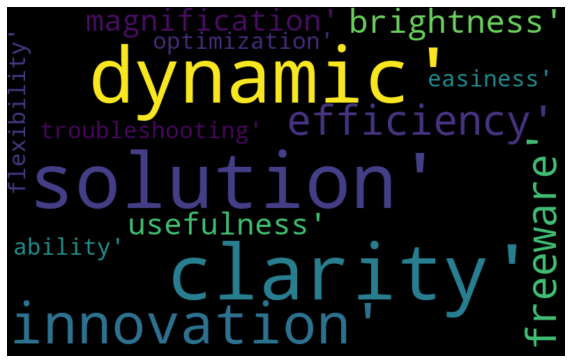

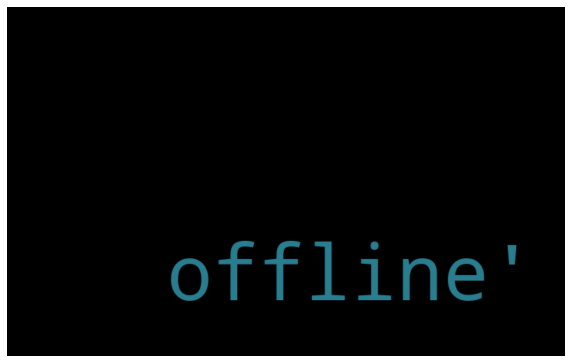

(None, None)

In [261]:
wordcloud_aspect(df_functionality[df_functionality["sentiment"] == 1]), wordcloud_aspect(df_functionality[df_functionality["sentiment"] == -1])

### Wordcloud for "positive" and "negative" aspects words for "pricing"

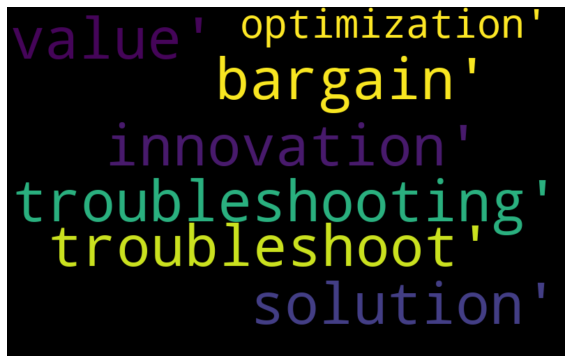

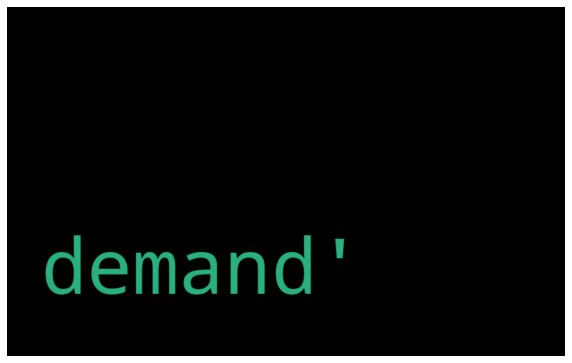

(None, None)

In [262]:
wordcloud_aspect(df_pricing[df_pricing["sentiment"] == 1]), wordcloud_aspect(df_pricing[df_pricing["sentiment"] == -1])

### Wordcloud for "positive" and "negative" aspects words for "support"

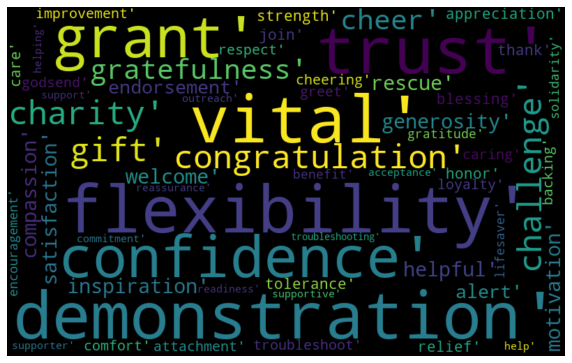

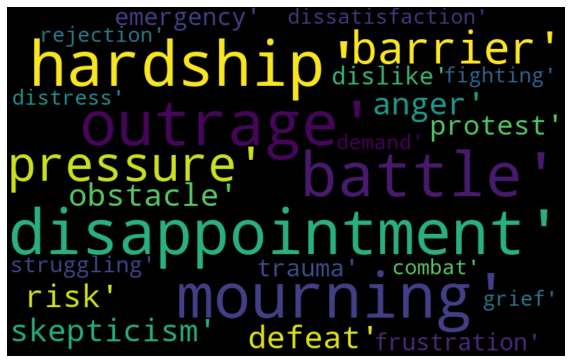

(None, None)

In [263]:
wordcloud_aspect(df_support[df_support["sentiment"] == 1]), wordcloud_aspect(df_support[df_support["sentiment"] == -1])